In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm,colors,gridspec
import xarray as xr
import numpy as np
import os

In [2]:
USER = os.environ['USER']
var = 'Phi'
layer1 = '0-200m'
layer2 = '200-600m'

In [3]:
datadir = f'/glade/scratch/{USER}/DPLE-results'
filename = f'{datadir}/DPLE_LME_box01-11_ACC_RMSE_{var}_{layer1}_leadyear_1-10.nc'
ds1 = xr.open_dataset(filename)
filename = f'{datadir}/DPLE_LME_box01-11_ACC_RMSE_{var}_{layer2}_leadyear_1-10.nc'
ds2 = xr.open_dataset(filename)

In [4]:
corr_p1 = ds1['corr_p'].values
rcri_p1 = ds1['rcri_p'].values
corr_d1 = ds1['corr_d'].values
rcri_d1 = ds1['rcri_d'].values
corr131 = ds1['corr13'].values
rcri131 = ds1['rcri13'].values

In [5]:
corr_p2 = ds2['corr_p'].values
rcri_p2 = ds2['rcri_p'].values
corr_d2 = ds2['corr_d'].values
rcri_d2 = ds2['rcri_d'].values
corr132 = ds2['corr13'].values
rcri132 = ds2['rcri13'].values

In [6]:
def array_change(varr):
    nphi,nbox,nlead = np.shape(varr)
    #[0,1,2,3,4,5,6,7,8,9,10]
    #[10,0,1,2,3,4,5,9,6,7,8]
    var1 = varr.copy()
    varr[:,0,:] = var1[:,10,:].copy()
    varr[:,1:7,:] = var1[:,0:6,:].copy()
    varr[:,7,:] = var1[:,9,:].copy()
    varr[:,8:11,:] = var1[:,6:9,:].copy()
    return varr

In [7]:
corr_p1 = array_change(corr_p1)
rcri_p1 = array_change(rcri_p1)
corr_d1 = array_change(corr_d1)
rcri_d1 = array_change(rcri_d1)
corr131 = array_change(corr131)
rcri131 = array_change(rcri131)
corr_p2 = array_change(corr_p2)
rcri_p2 = array_change(rcri_p2)
corr_d2 = array_change(corr_d2)
rcri_d2 = array_change(rcri_d2)
corr132 = array_change(corr132)
rcri132 = array_change(rcri132)

In [8]:
import corrstats
lenn = 2007+1-1954
alpha = 0.05
corr1 = corr_d1 - corr_p1
corr2 = corr_d2 - corr_p2
#nmae = nmae_p - nmae_d
# Test ACC difference significance
t_cr, p_cr = corrstats.dependent_corr(corr_p1,corr_d1,corr131,lenn-1,twotailed=False,method='steiger')
smask1 = p_cr<=alpha
pmask1 = corr_p1 >= rcri_p1
dmask1 = corr_d1 >= rcri_d1
maskp1 = corr1 > 0.
#
t_cr, p_cr = corrstats.dependent_corr(corr_p2,corr_d2,corr132,lenn-1,twotailed=False,method='steiger')
smask2 = p_cr<=alpha
pmask2 = corr_p2 >= rcri_p2
dmask2 = corr_d2 >= rcri_d2
maskp2 = corr2 > 0.

## plot

In [9]:
import matplotlib as mpl
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    '''
    https://stackoverflow.com/a/18926541
    '''
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [10]:
new_cmapt = truncate_colormap('RdBu_r', 0.375, 1.0)
new_cmaps = truncate_colormap('PRGn_r', 0.375, 1.0)

In [11]:
cmin = -.25;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev;vct = np.arange(cmin,cmax+dc,dc)
pal_normt = colors.BoundaryNorm(vct, ncolors=256, clip = False)
#cmin = -.025;cmax = 0.1;clev = 25.
cmin = -.25;cmax = 1.;clev = 25.
dc = (cmax - cmin)/clev;vcs = np.arange(cmin,cmax+dc,dc)
pal_norms = colors.BoundaryNorm(vcs, ncolors=256, clip = False)
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
#csfont = {'fontname':'Times New Roman'}
lme = [1,2,3,4,5,6,7,8,9,10,65]
xx = np.arange(1, len(lme)+1);yy = np.arange(1,11)
xx, yy = np.meshgrid(xx, yy)
labb = ['a','b','c','d','e','f','g','h','i']
labbb = ['low','medium','high']
labc = ['j','k','l','m','n','o','p','q','r']
lmen = ['AI','EBS','GoA','CC','GoC','GoM','SEUS','IPH','NEUS','SS','LN']

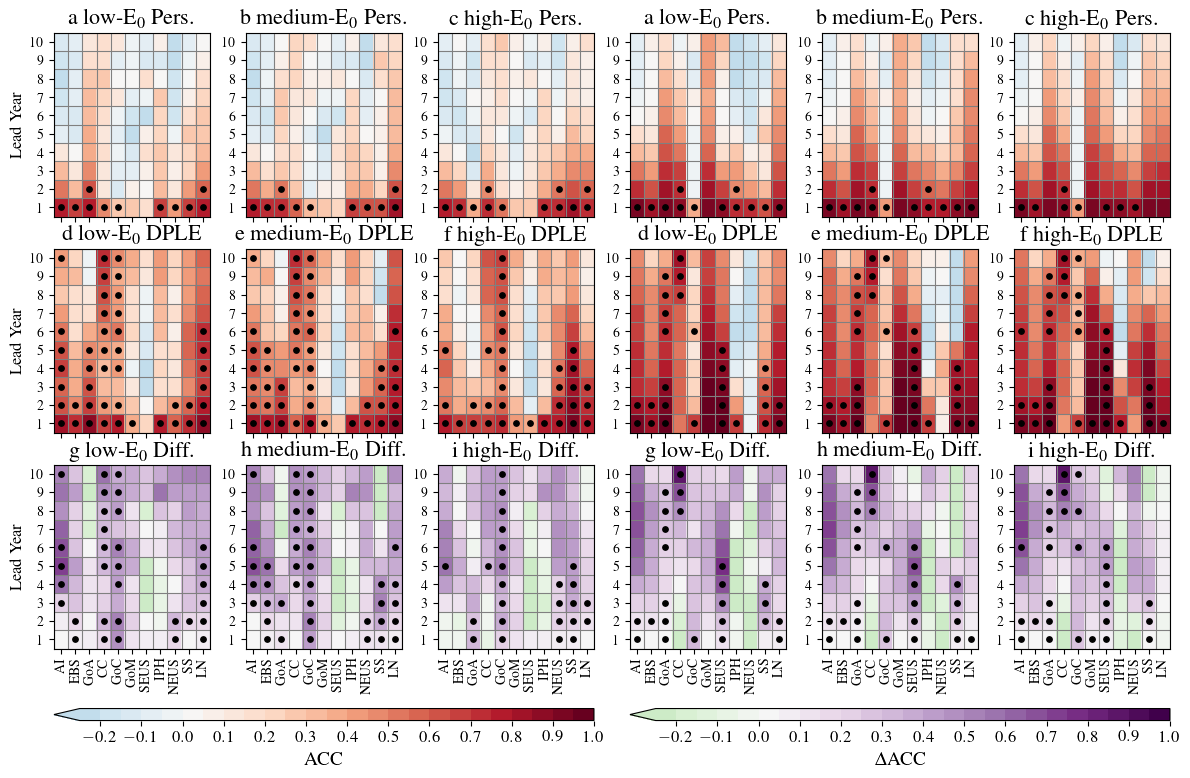

In [12]:
fig = plt.figure(figsize=[12, 8])
gs = gridspec.GridSpec(3, 6)
for cc in range(9):
    xi = int(np.floor(cc/3))
    xj = cc - xi*3
    #ax = fig.add_subplot(gs[xi, xj])
    ax = fig.add_axes([0.05+xj*0.16, 0.15+(2-xi)*0.27, 0.13, 0.23])
    if xi == 0:
        cd1 = ax.pcolor(xx, yy, corr_p1[xj].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~pmask1[xj].T)
        yy1 = np.ma.array(yy, mask=~pmask1[xj].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ Pers." % (labb[cc], labbb[xj]), fontsize=16)
    elif xi == 1:
        cd1 = ax.pcolor(xx, yy, corr_d1[xj].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~dmask1[xj].T)
        yy1 = np.ma.array(yy, mask=~dmask1[xj].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ DPLE" % (labb[cc], labbb[xj]), fontsize=16)
    elif xi == 2:
        cd2 = ax.pcolor(xx, yy, corr1[xj].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
        xx1 = np.ma.array(xx, mask=(~dmask1[xj]+~smask1[xj]+~maskp1[xj]).T)
        yy1 = np.ma.array(yy, mask=(~dmask1[xj]+~smask1[xj]+~maskp1[xj]).T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ Diff." % (labb[cc], labbb[xj]), fontsize=16)
    ax.set_xticks(np.arange(1, len(lme)+1))
    if xi == 2:
        ax.set_xticklabels(lmen, rotation=90)
    else:
        ax.set_xticklabels('')
    ax.set_yticks(np.arange(1, 11))
    ax.set_yticklabels(['%d' % ii for ii in range(1, 11)])
    if xj == 0:
        ax.set_ylabel('Lead Year', fontsize=12)
    for bi in np.arange(0.5, 12, 1):
        ax.plot([bi, bi], [0.5, 10.5], lw=.8, color='gray')
    for bj in np.arange(0.5, 11, 1):
        ax.plot([0.5, 11.5], [bj, bj], lw=.8, color='gray')
    
    #plt.colorbar(cd,label='ACC')
#
    #ax = fig.add_subplot(gs[xi, xj+3])
    ax = fig.add_axes([0.05+(xj+3)*0.16, 0.15+(2-xi)*0.27, 0.13, 0.23])
    if xi == 0:
        cd1 = ax.pcolor(xx, yy, corr_p2[xj].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~pmask2[xj].T)
        yy1 = np.ma.array(yy, mask=~pmask2[xj].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ Pers." % (labb[cc], labbb[xj]), fontsize=16)
    elif xi == 1:
        cd1 = ax.pcolor(xx, yy, corr_d2[xj].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~dmask2[xj].T)
        yy1 = np.ma.array(yy, mask=~dmask2[xj].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ DPLE" % (labb[cc], labbb[xj]), fontsize=16)
    elif xi == 2:
        cd2 = ax.pcolor(xx, yy, corr2[xj].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
        xx1 = np.ma.array(xx, mask=(~dmask2[xj]+~smask2[xj]+~maskp2[xj]).T)
        yy1 = np.ma.array(yy, mask=(~dmask2[xj]+~smask2[xj]+~maskp2[xj]).T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        ax.set_title(r"%s %s-E$_0$ Diff." % (labb[cc], labbb[xj]), fontsize=16)
    ax.set_xticks(np.arange(1, len(lme)+1))
    if xi == 2:
        ax.set_xticklabels(lmen, rotation=90)
    else:
        ax.set_xticklabels('')
    ax.set_yticks(np.arange(1, 11))
    ax.set_yticklabels(['%d' % ii for ii in range(1, 11)])
    for bi in np.arange(0.5, 12, 1):
        ax.plot([bi, bi], [0.5, 10.5], lw=.8, color='gray')
    for bj in np.arange(0.5, 11, 1):
        ax.plot([0.5, 11.5], [bj, bj], lw=.8, color='gray')
    #if xj == 0:
    #    ax.set_ylabel('Lead Year', fontsize=12)
    #plt.colorbar(cc,label='RMSE')
cbaxes = fig.add_axes([0.05, 0.06, 0.45, 0.015])
cb = plt.colorbar(cd1, orientation="horizontal", cax=cbaxes, extend='min', ticks=np.arange(-1,1.01,0.1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label='ACC', fontsize=14, fontweight='bold')
#
cbaxes = fig.add_axes([0.53, 0.06, 0.45, 0.015])
cb = plt.colorbar(cd2, orientation="horizontal", cax=cbaxes, extend='min', ticks=np.arange(-5,5.01,0.1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label=r'$\Delta$ACC', fontsize=14, fontweight='bold')
plt.show()

In [13]:
fig = plt.figure(figsize=[7.5, 5.3])
gs = gridspec.GridSpec(2, 11)
xx = np.arange(0,3);yy = np.arange(1,11)
xx, yy = np.meshgrid(xx, yy)
for hh,corr_d,dmask in [[0,corr_d1,dmask1],[1,corr_d2,dmask2]]:
    for ii in range(11):
        ax = fig.add_subplot(gs[hh,ii])
        cd1 = ax.pcolor(xx, yy, corr_d[:3,ii,:].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~dmask[:3,ii,:].T)
        yy1 = np.ma.array(yy, mask=~dmask[:3,ii,:].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        for bi in np.arange(0.5, 2, 1):
            ax.plot([bi, bi], [0.5, 10.5], lw=.8, color='gray')
        for bj in np.arange(1.5, 11, 1):
            ax.plot([-0.5, 2.5], [bj, bj], lw=.8, color='gray')
        ax.set_xticks(np.arange(0, 3))
        ax.set_yticks(np.arange(1,11))
        if hh == 0:
            ax.set_xticklabels('')
        else:
            ax.set_xticklabels(['L', 'M', 'H'], fontsize=12)
        ax.set_yticklabels(['%d' % ii for ii in np.arange(1,11)], fontsize=12)
        if ii > 0:
            ax.set_yticklabels('')
        else:
            ax.set_ylabel('Lead Year', fontsize=14)
        ax.set_title(lmen[ii],fontsize=14)
        if hh == 1 and ii == 5:
            ax.set_xlabel('Temperature Sensitivity of Hypoxia Vulnerability ($E_o$)', fontsize=16)
cbaxes = fig.add_axes([0.92, 0.12, 0.015, 0.75])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=np.arange(-1,1.01,0.1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label='DPLE ACC', fontsize=14, fontweight='bold')

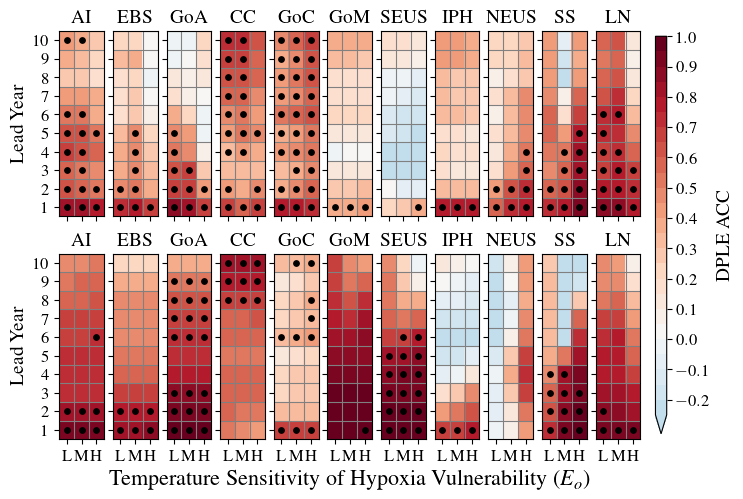

In [14]:
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_DPLE_ACC_{var}_{layer1}_{layer2}_leadyear_1-10_pcolor.png'
plt.savefig(outfile,dpi=400)
plt.show()

In [15]:
fig = plt.figure(figsize=[7.5, 5.3])
gs = gridspec.GridSpec(2, 11)
xx = np.arange(0,3);yy = np.arange(1,11)
xx, yy = np.meshgrid(xx, yy)
for hh,corr_p,pmask in [[0,corr_p1,pmask1],[1,corr_p2,pmask2]]:
    for ii in range(11):
        ax = fig.add_subplot(gs[hh,ii])
        cd1 = ax.pcolor(xx, yy, corr_p[:3,ii,:].T, shading='nearest', cmap=new_cmapt, norm=pal_normt)
        xx1 = np.ma.array(xx, mask=~pmask[:3,ii,:].T)
        yy1 = np.ma.array(yy, mask=~pmask[:3,ii,:].T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        for bi in np.arange(0.5, 2, 1):
            ax.plot([bi, bi], [0.5, 10.5], lw=.8, color='gray')
        for bj in np.arange(1.5, 11, 1):
            ax.plot([-0.5, 2.5], [bj, bj], lw=.8, color='gray')
        ax.set_xticks(np.arange(0, 3))
        ax.set_yticks(np.arange(1,11))
        if hh == 1:
            ax.set_xticklabels(['L', 'M', 'H'], fontsize=12)
        else:
            ax.set_xticklabels('')
        if ii > 0:
            ax.set_yticklabels('')
        else:
            ax.set_ylabel('Lead Year', fontsize=14)
        ax.set_title(lmen[ii], fontsize=14)
        if hh == 1 and ii == 5:
            ax.set_xlabel('Temperature Sensitivity of Hypoxia Vulnerability ($E_o$)', fontsize=16)
cbaxes = fig.add_axes([0.92, 0.12, 0.015, 0.75])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=np.arange(-1,1.01,0.1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label='Pers. ACC', fontsize=14, fontweight='bold')

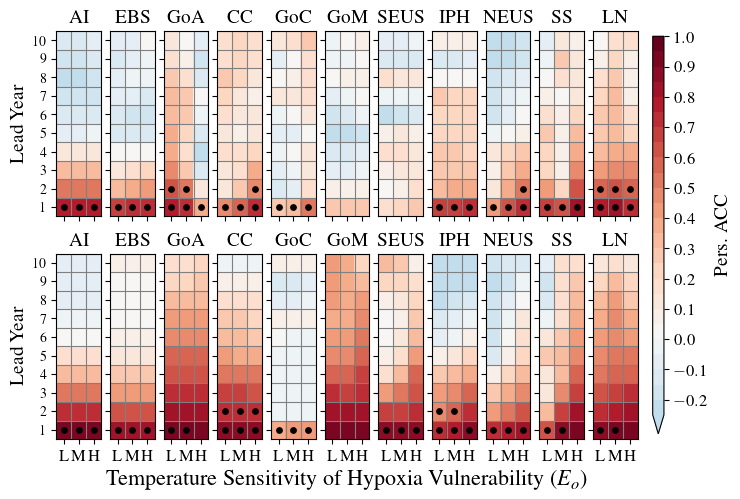

In [16]:
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_Persistence_ACC_{var}_{layer1}_{layer2}_leadyear_1-10_pcolor.png'
plt.savefig(outfile,dpi=400)
plt.show()

In [17]:
fig = plt.figure(figsize=[7.5, 5.3])
gs = gridspec.GridSpec(2, 11)
xx = np.arange(0,3);yy = np.arange(1,11)
xx, yy = np.meshgrid(xx, yy)
for hh,corr,dmask,smask,maskp in [[0,corr1,dmask1,smask1,maskp1],[1,corr2,dmask2,smask2,maskp2]]:
    for ii in range(11):
        ax = fig.add_subplot(gs[hh,ii])
        cd1 = ax.pcolor(xx, yy, corr[:3,ii,:].T, shading='nearest', cmap=new_cmaps, norm=pal_norms)
        xx1 = np.ma.array(xx, mask=(~dmask[:3,ii,:]+~smask[:3,ii,:]+~maskp[:3,ii,:]).T)
        yy1 = np.ma.array(yy, mask=(~dmask[:3,ii,:]+~smask[:3,ii,:]+~maskp[:3,ii,:]).T)
        ax.scatter(xx1, yy1, s=60, marker='.', color='k', alpha=1)
        for bi in np.arange(0.5, 2, 1):
            ax.plot([bi, bi], [0.5, 10.5], lw=.8, color='gray')
        for bj in np.arange(1.5, 11, 1):
            ax.plot([-0.5, 2.5], [bj, bj], lw=.8, color='gray')
        ax.set_xticks(np.arange(0, 3))
        ax.set_yticks(np.arange(1,11))
        if hh == 1:
            ax.set_xticklabels(['L', 'M', 'H'], fontsize=12)
        else:
            ax.set_xticklabels('')
        if ii > 0:
            ax.set_yticklabels('')
        else:
            ax.set_ylabel('Lead Year', fontsize=14)
        ax.set_title(lmen[ii], fontsize=14)
        if hh == 1 and ii == 5:
            ax.set_xlabel('Temperature Sensitivity of Hypoxia Vulnerability ($E_o$)', fontsize=16)
cbaxes = fig.add_axes([0.92, 0.12, 0.015, 0.75])
cb = plt.colorbar(cd1, orientation="vertical", cax=cbaxes, extend='min', ticks=np.arange(-1,1.01,0.1))
cb.ax.tick_params(labelsize=12)
cb.set_label(label=r'$\Delta$ACC', fontsize=14, fontweight='bold')

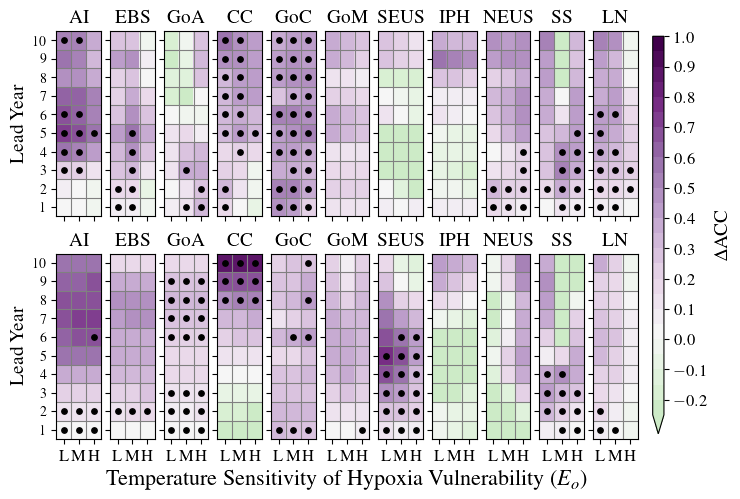

In [18]:
output=f'/glade/scratch/{USER}/DPLE-plots'
outfile=f'{output}/LME_box01-11_Delta_ACC_{var}_{layer1}_{layer2}_leadyear_1-10_pcolor.png'
plt.savefig(outfile,dpi=400)
plt.show()